# Project: Investigate No-Show Appointment Dataset 

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 30% of patients miss their appointments (no-show) and analysing this dataset would help in predicting why this is so. From the dataset, the dependent variable is 'No-show' and the independent variables are PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,
Handcap, and SMS_received


DESCRIPTION OF COLUMNS (source Kaggle https://www.kaggle.com/joniarroba/noshowappointments)
>1. PatientId : Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female 
4. ScheduledDay:The day of the actual appointment, when they have to visit the doctor
5. AppointmentDay:The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient
7. Neighbourhood:Where the appointment takes place.
8. Scholarship:True of False
9. Hypertension:True of False
10. Diabetes:True of False
11. Alcoholism:True of False
12. Handcap: True of False
13. SMS_received:1 or more messages sent to the patient.
14. No-show:True or False


### Research Questions
>1. Does the Amount of time between Appointment and Scheduled days influence no-show at doctor's appointment?
2. Does the health and habit of the patient (if diabetic, hypentensive, or an alcoholic) influence no-show at doctor's appointments?
3. Gender and age affect no-show at doctor's appointments?

In [70]:
#Importing the packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

sns.set_style('darkgrid')



<a id='wrangling'></a>
## Data Wrangling

> Loading the data, assessing it and cleaning. 

>In the succeeding cells, i'll load in the dataset, check for cleanliness, and prepare it for further analysis. 

### Steps taken during cleaning and justify cleaning decisions.
>1.  Created a timestamp datatype for Appointment and Scheduled days since they are indicating datetimes
2. Found the difference between  Appointment and Scheduled days and created a new column
3. Renamed the colums to all small letters and using underscores where necessary
4. Checked for duplicated rows to drop but found none
5. There were no null values 

In [71]:
# Load your data and printing out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
#inspecting the dataset
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [73]:
#checking for duplicated rows
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [75]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Cleaning the Dataset

The dataset has 110527 rows and 14 columns. 

df.info() indicates it contains no missing values.
Further analysis as shown, indicates it has no duplicated rows and null values.

### Up Next,
>1. The columns will be renamed for conveniency
>2. The PatientID,AppointmentID,and Neighbourhood columns will be dropped as they do not directly impact my analysis of this data
>3. The timestamp datatype for Appointment and Scheduled days was created since they are indicating datetimes
4. The Appointment and Scheduled days were dropped and a new column showing their difference was created 


In [76]:
#rename columns and printing out a few lines.
new_labels = list(df.columns)
new_labels = ['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship',
             'hypertension','diabetes','alcoholism','handicap','sms_received','no_show']
df.columns = new_labels
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
# Creating a timestamp datatype for Appointment and Scheduled days 
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['appointment_day'].dtypes

datetime64[ns, UTC]

#### finding differences in datetime
https://stackoverflow.com/questions/22923775/calculate-pandas-dataframe-time-difference-between-two-columns-in-hours-and-minu

In [78]:
#finding differences in datetime

df['day_difference'] = (df['appointment_day']-df['scheduled_day']).astype('timedelta64[D]')
  
df['day_difference']=(df['day_difference']).astype(int) 
df['day_difference']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: day_difference, Length: 110527, dtype: int32

In [79]:
df.drop(['patient_id','appointment_id','neighbourhood','scheduled_day','appointment_day'], axis = 1, inplace =True)
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_difference
0,F,62,0,1,0,0,0,0,No,-1
1,M,56,0,0,0,0,0,0,No,-1
2,F,62,0,0,0,0,0,0,No,-1
3,F,8,0,0,0,0,0,0,No,-1
4,F,56,0,1,1,0,0,0,No,-1


In [80]:
#replacing negative day_difference with 0

df.day_difference[df.day_difference.lt(0)] =0
df['day_difference']

C:\Users\CHIDINMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0          0
1          0
2          0
3          0
4          0
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: day_difference, Length: 110527, dtype: int32

In [81]:
#Label encoding no_show column to 1 and 0


df['no_show'][df['no_show']=='Yes']=0

df['no_show'][df['no_show']=='No']=1


#changing the column name from 'no_show' to 'present' to avoid confusions

df= df.rename (columns={'no_show':'present'})

C:\Users\CHIDINMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\CHIDINMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df['present'].value_counts()

1    88208
0    22319
Name: present, dtype: int64

In [101]:
df['day_difference'].describe()

count    110527.000000
mean          9.532739
std          15.027729
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: day_difference, dtype: float64

In [102]:
#The 'day_difference' is a converted to a categorical feature using Pandas.cut

bin_edges1 = [0,3,14,178]
bin_names = ['low','medium','high']
df['day_difference_levels']=pd.cut(df['day_difference'],bin_edges1,labels =bin_names)
df['day_difference_levels'].fillna('low',inplace=True)

In [106]:
df['day_difference_levels']

0          low
1          low
2          low
3          low
4          low
          ... 
110522    high
110523    high
110524    high
110525    high
110526    high
Name: day_difference_levels, Length: 110527, dtype: category
Categories (3, object): [low < medium < high]

In [115]:
#grouping by day_difference_levels to check the statistical data of patients that showed up or not

df.groupby(['day_difference_levels','present','gender']).mean()

age  scholarship  hypertension  \
day_difference_levels present gender                                         
low                   0       F       39.380616     0.133518      0.239273   
                              M       31.878351     0.068866      0.152165   
                      1       F       39.214014     0.125446      0.230004   
                              M       34.374843     0.051039      0.169167   
medium                0       F       34.930088     0.165064      0.171274   
                              M       30.483447     0.067912      0.154075   
                      1       F       39.758222     0.118691      0.223299   
                              M       34.150589     0.055101      0.186723   
high                  0       F       34.991844     0.133511      0.151418   
                              M       30.251698     0.049253      0.130095   
                      1       F       40.465067     0.095875      0.196128   
                              M       35.075406     0.039087      0.169492   

                                      diabetes  alcoholism  handicap  \
day_difference_levels present gender                                   
low                   0       F       0.104493    0.022211  0.025997   
                              M       0.062680    0.052371  0.039175   
                      1       F       0.087963    0.018530  0.023155   
                              M       0.062946    0.067142  0.030371   
medium                0       F       0.063902    0.025441  0.014223   
                              M       0.052632    0.055603  0.018251   
                      1       F       0.078476    0.014816  0.017014   
                              M       0.067528    0.046763  0.026815   
high                  0       F       0.050355    0.016489  0.017199   
                              M       0.046535    0.037704  0.014946   
                      1       F       0.060185    0.010101  0.013300   
                              M       0.053788    0.034936  0.022484   

                                      sms_received  day_difference  
day_difference_levels present gender                                
low                   0       F           0.147905        1.093135  
                              M           0.120825        0.928660  
                      1       F           0.062874        0.435463  
                              M           0.052507        0.371381  
medium                0       F           0.578125        8.273638  
                              M           0.523769        8.296689  
                      1       F           0.629925        7.899626  
                              M           0.597940        7.808044  
high                  0       F           0.575887       30.956738  
                              M           0.522079       30.843410  
                      1       F           0.645118       31.540909  
                              M           0.615358       31.098063

<a id='eda'></a>
## Exploratory Data Analysis

>  Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Does the Amount of time between Appointment and Scheduled days influence no-show at doctor's appointment?
> The dataset is divided into two dataframes:  'showed_up' and 'absent'

Grouping the each sub-dataset by 'no_show' and 'day_difference' and analysing the statistical data is done with aid of visualizations.

The 'day_difference' is a converted to a categorical feature using Pandas.cut


In [83]:
#dividing the dataset into those that showed up
showed_up = df.query('present == 1');
showed_up.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,day_difference
0,F,62,0,1,0,0,0,0,1,0
1,M,56,0,0,0,0,0,0,1,0
2,F,62,0,0,0,0,0,0,1,0
3,F,8,0,0,0,0,0,0,1,0
4,F,56,0,1,1,0,0,0,1,0


In [84]:
#dividing the dataset into those that were no-show
absent = df.query('present == 0')
absent.head()


,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,day_difference
6,F,23,0,0,0,0,0,0,0,1
7,F,39,0,0,0,0,0,0,0,1
11,M,29,0,0,0,0,0,1,0,2
17,F,40,1,0,0,0,0,0,0,0
20,F,30,0,0,0,0,0,0,0,1


In [85]:
absent['day_difference'].isnull().sum().any()

False

In [86]:
#ensuring that these queries included only one in each samples
num_samples = df.shape[0]
num_samples == showed_up['present'].count() + absent['present'].count()

True

In [87]:
showed_up.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_difference
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.171526
std,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,14.305874
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


From the information, querying the data set into those that showed up,  the following observations were made

1. Age: from the mean age, 50%,75% and the max, it can be assumed that older people showed up more for their doctor's appointment.

2. Hypertension: the statistical data might indicate that those that showed up for the doctor's appointment are not hypertensive

3. Diabetes:the statistical data might indicate that those that showed up for the doctor's appointment are not diabetic

4. Alcoholism: the statistical data might indicate that those that showed up for the doctor's appointment are not alcoholics

5. Sms_received: the statistical data might indicate that receiving the sms might not be the main factor that made these patients  show up for the doctor's appointment 

### Day Interval Implication
1. Low = lowest 25% of day_difference to  50% of day_difference
2. Medium = 50% of day_difference - 75% day_difference 
3. High = 75% - max day_difference

In [88]:
showed_up['day_difference'].describe()


count    88208.000000
mean         8.171526
std         14.305874
min          0.000000
25%          0.000000
50%          1.000000
75%         11.000000
max        178.000000
Name: day_difference, dtype: float64

In [89]:
absent['day_difference'].describe()

count    22319.000000
mean        14.912451
std         16.530724
min          0.000000
25%          3.000000
50%         10.000000
75%         22.000000
max        178.000000
Name: day_difference, dtype: float64

### Comparing the statistical data from the two sub-queries

>1. For those that showed up, the mean day difference between the appointment day and scheduled is relatively shorter, when compared with the day difference of those that didn't show up. This could imply that, the nearer it is to the appointment day, the higher chances of the patient showing up for their doctor's appointment.

>2. Plotting these two distributions is done below

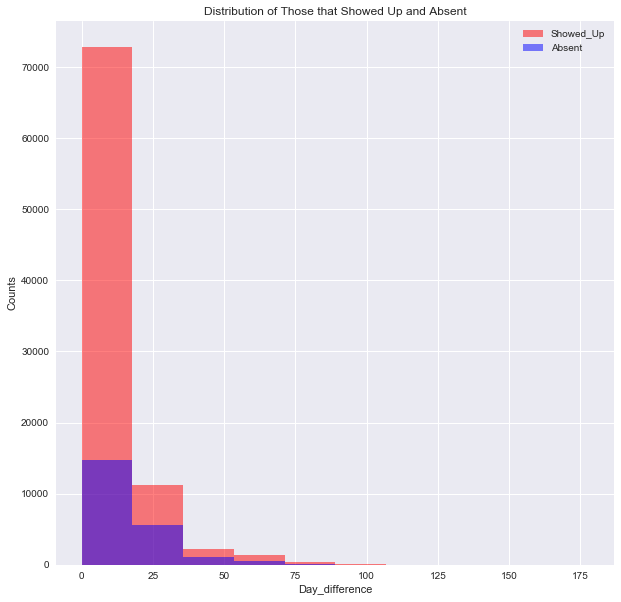

In [90]:
showed_up['day_difference'].hist(color='r',alpha=0.5,label='Showed_Up',figsize=(10,10))
absent['day_difference'].hist(color='b',alpha=0.5,label='Absent',figsize=(10,10))
plt.xlabel('Day_difference')
plt.ylabel('Counts')
plt.title('Distribution of Those that Showed Up and Absent')
plt.legend()

In [91]:
#The 'day_difference' is a converted to a categorical feature using Pandas.cut

bin_edges1 = [0,1,11,178]
bin_names = ['low','medium','high']
showed_up['day_difference_levels']=pd.cut(showed_up['day_difference'],bin_edges1,labels =bin_names)
showed_up['day_difference_levels'].fillna('low',inplace=True)

C:\Users\CHIDINMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\CHIDINMA\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [95]:
showed_up

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,day_difference,day_difference_levels
0,F,62,0,1,0,0,0,0,1,0,low
1,M,56,0,0,0,0,0,0,1,0,low
2,F,62,0,0,0,0,0,0,1,0,low
3,F,8,0,0,0,0,0,0,1,0,low
4,F,56,0,1,1,0,0,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,0,0,0,0,0,1,1,34,high
110523,F,51,0,0,0,0,0,1,1,34,high
110524,F,21,0,0,0,0,0,1,1,40,high
110525,F,38,0,0,0,0,0,1,1,40,high


In [99]:
#grouping by day_difference_levels to check the statistical data of patients that showed up

showed_up.groupby(['day_difference_levels','present']).mean()

,,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_difference
day_difference_levels,present,,,,,,,,
low,1,36.618885,0.100187,0.198308,0.076010,0.037396,0.026003,0.000000,0.111384
medium,1,40.062877,0.091301,0.236413,0.084685,0.026415,0.021661,0.583141,5.262926
high,1,38.133523,0.083085,0.187262,0.059104,0.019442,0.016874,0.632720,27.891283


In [93]:
bin_edges2 = [2.0,10.0,22.0,178.0]
absent['day_difference_levels']= pd.cut(absent['day_difference'],bin_edges2,labels =bin_names)
absent['day_difference_levels'].fillna('low',inplace=True)


C:\Users\CHIDINMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CHIDINMA\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#plotting both same histogram

plt.hist(showed_up['day_difference'],color='r',alpha=0.5,label='showed_up')
plt.legend()
plt.show()

In [94]:
absent

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,day_difference,day_difference_levels
6,F,23,0,0,0,0,0,0,0,1,low
7,F,39,0,0,0,0,0,0,0,1,low
11,M,29,0,0,0,0,0,1,0,2,low
17,F,40,1,0,0,0,0,0,0,0,low
20,F,30,0,0,0,0,0,0,0,1,low
...,...,...,...,...,...,...,...,...,...,...,...
110484,F,45,0,0,0,0,0,0,0,3,low
110492,M,33,0,1,0,0,0,0,0,0,low
110496,F,37,0,1,0,0,0,0,0,1,low
110515,M,33,0,1,0,0,0,0,0,1,low


# Exploring Health and habits and No-show

### Research Question 2
Does the health and habit of the patient (if diabetic, hypentensive, or an alcoholic) influence no-show at doctor's appointments?

In [24]:
#grouping by diabetic, hypertensive and alcoholic to see how this affects the patient turn up

df.groupby(['present'],as_index=False)['diabetes'].describe()

count  0    22319.000000
       1    88208.000000
mean   0        0.064071
       1        0.073837
std    0        0.244885
       1        0.261507
min    0        0.000000
       1        0.000000
25%    0        0.000000
       1        0.000000
50%    0        0.000000
       1        0.000000
75%    0        0.000000
       1        0.000000
max    0        1.000000
       1        1.000000
dtype: float64

In [30]:
#changing the datatype of present column to int

df['present'] = df['present'].astype('int')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
gender            110527 non-null object
age               110527 non-null int64
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
present           110527 non-null int32
day_difference    110527 non-null int32
dtypes: int32(2), int64(7), object(1)
memory usage: 7.6+ MB


In [35]:
df.plot(x='diabetes',y='present',kind='bar',figsize=(8,8))
plt.show()

KeyboardInterrupt: 

In [33]:

df.groupby(['present'],as_index=False)['hypertension'].describe()

count  0    22319.000000
       1    88208.000000
mean   0        0.169004
       1        0.204392
std    0        0.374764
       1        0.403259
min    0        0.000000
       1        0.000000
25%    0        0.000000
       1        0.000000
50%    0        0.000000
       1        0.000000
75%    0        0.000000
       1        0.000000
max    0        1.000000
       1        1.000000
dtype: float64

In [ ]:
df.plot(x='hypertension',y='present',kind='hist',figsize=(8,8))
plt.show()

In [28]:

df.groupby(['present'],as_index=False)['alcoholism'].describe()

count  0    22319.000000
       1    88208.000000
mean   0        0.030333
       1        0.030417
std    0        0.171505
       1        0.171732
min    0        0.000000
       1        0.000000
25%    0        0.000000
       1        0.000000
50%    0        0.000000
       1        0.000000
75%    0        0.000000
       1        0.000000
max    0        1.000000
       1        1.000000
dtype: float64

### Research Question 2  (Replace this header name!)

In [50]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


# Comparing with No-show

In [60]:
show_up = df.No-show == 'No'
show_up.head()

AttributeError: 'DataFrame' object has no attribute 'No'

In [54]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [58]:
df['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!